In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
d = fetch_california_housing()

In [4]:
df = pd.DataFrame(d.data,columns=d.feature_names)

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
df['target'] = d.target


In [7]:
df.shape

(20640, 9)

In [8]:

df = df.sample(frac=0.25)
df.shape

(5160, 9)

In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
19416,3.2246,19.0,5.764025,1.079252,3559.0,3.169190,37.69,-121.08,1.293
16205,2.0303,40.0,4.925087,1.141115,2037.0,3.548780,37.94,-121.29,0.638
19715,1.8095,25.0,4.170803,0.966423,2076.0,3.030657,39.28,-121.64,0.641
1314,5.6506,10.0,7.092150,1.039249,1878.0,3.204778,37.99,-121.79,1.786
5069,1.8400,45.0,3.983607,1.058548,1484.0,3.475410,33.99,-118.30,0.914


In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()

In [13]:
reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [14]:
y_pred=reg.predict(X_test)
from sklearn.metrics import *
r2_score(y_pred,y_test)

0.47325418328791746

In [15]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)
parameter ={
        'criterion' :['friedman_mse', 'squared_error', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'max_depth' :[0,1,2,3,4,5,6,7],
    'max_features':['auto','sqrt','log2']
}

In [18]:
from sklearn.model_selection import GridSearchCV
rgv = GridSearchCV(DecisionTreeRegressor(),cv=2,param_grid = parameter,scoring = 'neg_mean_squared_error',refit=True,verbose=3)

In [19]:
rgv.fit(X_train,y_train)

Fitting 2 folds for each of 192 candidates, totalling 384 fits
[CV 1/2] END criterion=friedman_mse, max_depth=0, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/2] END criterion=friedman_mse, max_depth=0, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/2] END criterion=friedman_mse, max_depth=0, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/2] END criterion=friedman_mse, max_depth=0, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 1/2] END criterion=friedman_mse, max_depth=0, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 2/2] END criterion=friedman_mse, max_depth=0, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 1/2] END criterion=friedman_mse, max_depth=0, max_features=sqrt, splitter=random;, score=nan total time=   0.0s
[CV 2/2] END criterion=friedman_mse, max_depth=0, max_features=sqrt, splitter=random;, score=nan total time=   0.0s
[CV 1/2] END crit

[CV 1/2] END criterion=friedman_mse, max_depth=6, max_features=sqrt, splitter=random;, score=-0.939 total time=   0.0s
[CV 2/2] END criterion=friedman_mse, max_depth=6, max_features=sqrt, splitter=random;, score=-0.967 total time=   0.0s
[CV 1/2] END criterion=friedman_mse, max_depth=6, max_features=log2, splitter=best;, score=-0.585 total time=   0.0s
[CV 2/2] END criterion=friedman_mse, max_depth=6, max_features=log2, splitter=best;, score=-0.709 total time=   0.0s
[CV 1/2] END criterion=friedman_mse, max_depth=6, max_features=log2, splitter=random;, score=-0.837 total time=   0.0s
[CV 2/2] END criterion=friedman_mse, max_depth=6, max_features=log2, splitter=random;, score=-0.861 total time=   0.0s
[CV 1/2] END criterion=friedman_mse, max_depth=7, max_features=auto, splitter=best;, score=-0.434 total time=   0.0s
[CV 2/2] END criterion=friedman_mse, max_depth=7, max_features=auto, splitter=best;, score=-0.566 total time=   0.0s
[CV 1/2] END criterion=friedman_mse, max_depth=7, max_fe

[CV 1/2] END criterion=squared_error, max_depth=5, max_features=auto, splitter=best;, score=-0.456 total time=   0.0s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=auto, splitter=best;, score=-0.564 total time=   0.0s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=auto, splitter=random;, score=-0.659 total time=   0.0s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=auto, splitter=random;, score=-0.655 total time=   0.0s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=best;, score=-0.641 total time=   0.0s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=best;, score=-0.855 total time=   0.0s
[CV 1/2] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=random;, score=-0.956 total time=   0.0s
[CV 2/2] END criterion=squared_error, max_depth=5, max_features=sqrt, splitter=random;, score=-1.079 total time=   0.0s
[CV 1/2] END criterion=squared_error, max_depth=

[CV 2/2] END criterion=absolute_error, max_depth=2, max_features=log2, splitter=best;, score=-0.941 total time=   0.0s
[CV 1/2] END criterion=absolute_error, max_depth=2, max_features=log2, splitter=random;, score=-1.288 total time=   0.0s
[CV 2/2] END criterion=absolute_error, max_depth=2, max_features=log2, splitter=random;, score=-0.968 total time=   0.0s
[CV 1/2] END criterion=absolute_error, max_depth=3, max_features=auto, splitter=best;, score=-0.631 total time=   0.3s
[CV 2/2] END criterion=absolute_error, max_depth=3, max_features=auto, splitter=best;, score=-0.667 total time=   0.3s
[CV 1/2] END criterion=absolute_error, max_depth=3, max_features=auto, splitter=random;, score=-0.775 total time=   0.1s
[CV 2/2] END criterion=absolute_error, max_depth=3, max_features=auto, splitter=random;, score=-0.818 total time=   0.0s
[CV 1/2] END criterion=absolute_error, max_depth=3, max_features=sqrt, splitter=best;, score=-0.650 total time=   0.0s
[CV 2/2] END criterion=absolute_error, m

[CV 2/2] END criterion=poisson, max_depth=1, max_features=log2, splitter=random;, score=-1.002 total time=   0.0s
[CV 1/2] END criterion=poisson, max_depth=2, max_features=auto, splitter=best;, score=-0.717 total time=   0.0s
[CV 2/2] END criterion=poisson, max_depth=2, max_features=auto, splitter=best;, score=-0.778 total time=   0.0s
[CV 1/2] END criterion=poisson, max_depth=2, max_features=auto, splitter=random;, score=-0.781 total time=   0.0s
[CV 2/2] END criterion=poisson, max_depth=2, max_features=auto, splitter=random;, score=-1.157 total time=   0.0s
[CV 1/2] END criterion=poisson, max_depth=2, max_features=sqrt, splitter=best;, score=-1.088 total time=   0.0s
[CV 2/2] END criterion=poisson, max_depth=2, max_features=sqrt, splitter=best;, score=-0.951 total time=   0.0s
[CV 1/2] END criterion=poisson, max_depth=2, max_features=sqrt, splitter=random;, score=-1.284 total time=   0.0s
[CV 2/2] END criterion=poisson, max_depth=2, max_features=sqrt, splitter=random;, score=-1.381 t

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error',
                                       'absolute_error', 'poisson'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [20]:
rgv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [21]:
reg1 = DecisionTreeRegressor(criterion= 'friedman_mse',max_depth= 6,max_features= 'auto',splitter= 'best')

In [22]:
reg1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                      max_features='auto')

In [23]:
y_pred= reg1.predict(X_test)

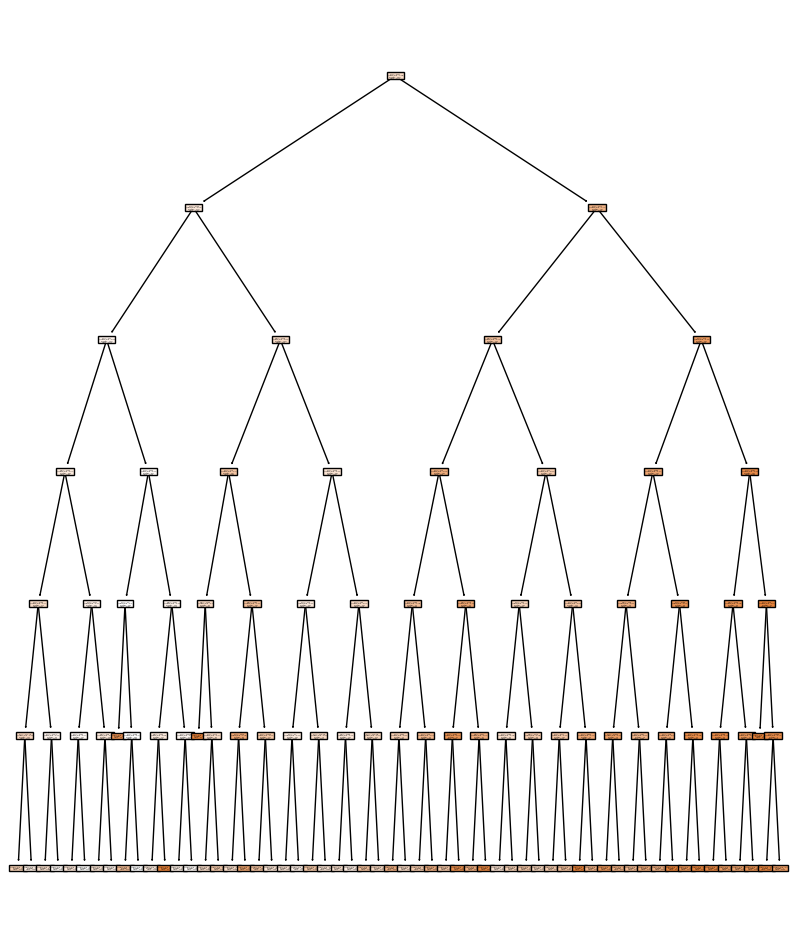

In [26]:

from sklearn import tree
plt.figure(figsize=(10,12))
tree.plot_tree(reg1,filled=True)
plt.show()

In [27]:
r2_score(y_pred,y_test)

0.432702699295446